In [1]:
#importing
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#dataset
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/edX.csv")
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [3]:
#some of the features
df1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.head(9)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0         2.0          4                   9.9                  6.7   
1         2.4          4                  11.2                  7.7   
2         1.5          4                   6.0                  5.8   
3         3.5          6                  12.7                  9.1   
4         3.5          6                  12.1                  8.7   
5         3.5          6                  11.9                  7.7   
6         3.5          6                  11.8                  8.1   
7         3.7          6                  12.8                  9.0   
8         3.7          6                  13.4                  9.5   

   FUELCONSUMPTION_COMB  CO2EMISSIONS  
0                   8.5           196  
1                   9.6           221  
2                   5.9           136  
3                  11.1           255  
4                  10.6           244  
5                  10.0           230  
6                  10.1           232  
7                  11.1           255  
8                  11.6           267

In [4]:
#plotting
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

In [5]:
#splitting
split = np.random.rand(len(df)) < 0.8
train = df1[split]
test = df1[~split]

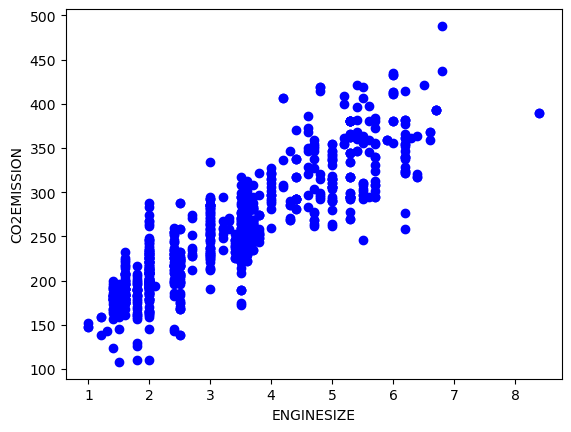

In [6]:
#training
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

In [7]:
#ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB & CO2EMISSIONS

In [8]:
#modelling
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg = linear_model.LinearRegression()
fit = reg.fit (train_x, train_y)
print ('Coefficients: ', fit.coef_)
print (" Intercept : ", fit.intercept_)

Coefficients:  [[11.2208439   7.61446471  9.39779305]]
 Intercept :  [65.2470612]


In [9]:
#calculations
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = fit.predict(test_x)
print("Mean Squared Error (MSE) : %.2f" % np.mean((predict - test_y) ** 2))
print('Variance score: %.2f' % fit.score(test_x, test_y))

Mean Squared Error (MSE) : 513.37
Variance score: 0.85


In [10]:
#ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY & CO2EMISSIONS

In [11]:
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg = linear_model.LinearRegression()
fit = reg.fit (train_x, train_y)
print ('Coefficients: ', fit.coef_)
print (" Intercept : ", fit.intercept_)

Coefficients:  [[11.24883108  7.50569893  5.44734027  3.861627  ]]
 Intercept :  [65.5978616]


In [12]:
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = fit.predict(test_x)
print("Mean Squared Error (MSE) : %.2f" % np.mean((predict - test_y) ** 2))
print('Variance score: %.2f' % fit.score(test_x, test_y))

Mean Squared Error (MSE) : 511.56
Variance score: 0.85
